## IMPORT REQUIRED LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## LOAD THE CSV FILE

In [3]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='7xnZbnxEIg4_pndftbJow9t6lTFyaiCipZosDWY7NqfP',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'chronickidneydiseaseprediction-donotdelete-pr-zizvzwot2oq0ty'
object_key = 'chronickidneydisease.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44.0,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38.0,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300,4.6,no,no,no,good,no,no,ckd


## DATASET

In [4]:
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44.0,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38.0,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47.0,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54.0,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49.0,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51.0,7200,5.9,no,no,no,good,no,no,notckd


## DESCRIPTIVE ANALYSIS OF THE DATASET

In [5]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000


In [6]:
print("The size of the dataset is ",df.shape)

The size of the dataset is  (400, 26)


In [7]:
print("Datatype of each column : ")
print("------------------------------------------------")
df.info()

Datatype of each column : 
------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv 

In [8]:
df.corr()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv
id,1.000000,-0.185308,-0.245744,0.642156,-0.541993,-0.283416,-0.338673,-0.307175,-0.268683,0.364251,-0.092347,0.640298,0.630019
age,-0.185308,1.000000,0.159480,-0.191096,0.122091,0.220866,0.244992,0.196985,0.132531,-0.100046,0.058377,-0.192928,-0.242119
bp,-0.245744,0.159480,1.000000,-0.218836,0.160689,0.222576,0.160193,0.188517,0.146222,-0.116422,0.075151,-0.306540,-0.326319
sg,0.642156,-0.191096,-0.218836,1.000000,-0.469760,-0.296234,-0.374710,-0.314295,-0.361473,0.412190,-0.072787,0.602582,0.603560
al,-0.541993,0.122091,0.160689,-0.469760,1.000000,0.269305,0.379464,0.453528,0.399198,-0.459896,0.129038,-0.634632,-0.611891
su,-0.283416,0.220866,0.222576,-0.296234,0.269305,1.000000,0.717827,0.168583,0.223244,-0.131776,0.219450,-0.224775,-0.239189
bgr,-0.338673,0.244992,0.160193,-0.374710,0.379464,0.717827,1.000000,0.143322,0.114875,-0.267848,0.066966,-0.306189,-0.301385
bu,-0.307175,0.196985,0.188517,-0.314295,0.453528,0.168583,0.143322,1.000000,0.586368,-0.323054,0.357049,-0.610360,-0.607621
sc,-0.268683,0.132531,0.146222,-0.361473,0.399198,0.223244,0.114875,0.586368,1.000000,-0.690158,0.326107,-0.401670,-0.404193
sod,0.364251,-0.100046,-0.116422,0.412190,-0.459896,-0.131776,-0.267848,-0.323054,-0.690158,1.000000,0.097887,0.365183,0.376914


<AxesSubplot:>

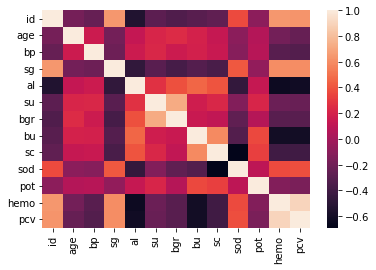

In [9]:
sns.heatmap(df.corr())

## REMOVING UNNECESSARY VALUES

In [10]:
print("Drop unnecessary column : ")
print("-----------------------------------")
df = df.drop(columns = ['id'],axis = 1)
df

Drop unnecessary column : 
-----------------------------------


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200,5.9,no,no,no,good,no,no,notckd


In [11]:
df['age'].value_counts()

60.0    19
65.0    17
48.0    12
55.0    12
50.0    12
        ..
83.0     1
27.0     1
14.0     1
81.0     1
79.0     1
Name: age, Length: 76, dtype: int64

In [12]:
df['bp'].value_counts()

80.0     116
70.0     112
60.0      71
90.0      53
100.0     25
50.0       5
110.0      3
140.0      1
180.0      1
120.0      1
Name: bp, dtype: int64

In [13]:
df['sg'].value_counts()

1.020    106
1.010     84
1.025     81
1.015     75
1.005      7
Name: sg, dtype: int64

In [14]:
df['al'].value_counts()

0.0    199
1.0     44
2.0     43
3.0     43
4.0     24
5.0      1
Name: al, dtype: int64

In [15]:
df['su'].value_counts()

0.0    290
2.0     18
3.0     14
4.0     13
1.0     13
5.0      3
Name: su, dtype: int64

In [16]:
df['rbc'].value_counts()

normal      201
abnormal     47
Name: rbc, dtype: int64

In [17]:
df['pc'].value_counts()

normal      259
abnormal     76
Name: pc, dtype: int64

In [18]:
df['pcc'].value_counts()

notpresent    354
present        42
Name: pcc, dtype: int64

In [19]:
df['ba'].value_counts()

notpresent    374
present        22
Name: ba, dtype: int64

In [20]:
df['bgr'].value_counts()

99.0     10
93.0      9
100.0     9
107.0     8
131.0     6
         ..
288.0     1
182.0     1
84.0      1
256.0     1
226.0     1
Name: bgr, Length: 146, dtype: int64

In [21]:
df['bu'].value_counts()

46.0     15
25.0     13
19.0     11
40.0     10
50.0      9
         ..
176.0     1
145.0     1
92.0      1
322.0     1
186.0     1
Name: bu, Length: 118, dtype: int64

In [22]:
df['sc'].value_counts()

1.2     40
1.1     24
0.5     23
1.0     23
0.9     22
        ..
3.8      1
12.2     1
9.2      1
13.8     1
0.4      1
Name: sc, Length: 84, dtype: int64

In [23]:
df['sod'].value_counts()

135.0    40
140.0    25
141.0    22
139.0    21
138.0    20
142.0    20
137.0    19
150.0    17
136.0    17
147.0    13
145.0    11
132.0    10
146.0    10
131.0     9
144.0     9
133.0     8
130.0     7
134.0     6
143.0     4
124.0     3
127.0     3
122.0     2
113.0     2
120.0     2
125.0     2
128.0     2
114.0     2
126.0     1
163.0     1
115.0     1
129.0     1
4.5       1
104.0     1
111.0     1
Name: sod, dtype: int64

In [24]:
df['pot'].value_counts()

3.5     30
5.0     30
4.9     27
4.7     17
4.8     16
3.9     14
3.8     14
4.1     14
4.2     14
4.0     14
4.4     14
4.5     13
4.3     12
3.7     12
3.6      8
4.6      7
3.4      5
5.2      5
5.3      4
5.7      4
3.2      3
5.5      3
6.3      3
5.4      3
2.9      3
3.3      3
5.6      2
3.0      2
6.5      2
2.5      2
5.9      2
5.8      2
7.6      1
47.0     1
6.6      1
5.1      1
6.4      1
2.8      1
2.7      1
39.0     1
Name: pot, dtype: int64

In [25]:
df['hemo'].value_counts()

15.0    16
10.9     8
13.6     7
13.0     7
9.8      7
        ..
6.8      1
8.5      1
7.3      1
12.8     1
17.6     1
Name: hemo, Length: 115, dtype: int64

In [26]:
df['pcv'].value_counts()

41.0    21
52.0    21
44.0    19
48.0    19
40.0    16
43.0    15
42.0    13
45.0    13
32.0    12
50.0    12
36.0    12
33.0    12
28.0    12
34.0    11
37.0    11
30.0     9
29.0     9
35.0     9
46.0     9
31.0     8
24.0     7
39.0     7
26.0     6
38.0     5
53.0     4
51.0     4
49.0     4
47.0     4
54.0     4
25.0     3
27.0     3
22.0     3
19.0     2
23.0     2
15.0     1
21.0     1
20.0     1
17.0     1
9.0      1
18.0     1
14.0     1
16.0     1
Name: pcv, dtype: int64

In [27]:
df['pcv'] = df['pcv'].replace('\t43','43')

In [28]:
df=df[df['pcv'] != '\t?']

In [29]:
df['wc'].value_counts()

9800     11
6700     10
9200      9
9600      9
7200      9
         ..
19100     1
\t?       1
12300     1
14900     1
12700     1
Name: wc, Length: 92, dtype: int64

In [30]:
df=df[df['wc'] != '\t?']

In [31]:
df['rc'].value_counts()

5.2    18
4.5    16
4.9    14
4.7    11
5      10
3.9    10
4.8    10
4.6     9
3.4     9
5.9     8
3.7     8
6.1     8
5.5     8
5.4     7
5.3     7
5.8     7
3.8     7
4.2     6
4.3     6
4       6
5.6     6
5.1     5
6.2     5
6.4     5
5.7     5
6.5     5
4.1     5
4.4     5
3.2     5
6       4
3.6     4
6.3     4
3.3     3
3       3
3.5     3
2.9     2
2.6     2
2.8     2
3.1     2
2.5     2
2.7     2
2.1     2
\t?     1
2.3     1
2.4     1
8       1
Name: rc, dtype: int64

In [32]:
df=df[df['rc'] != '\t?']

In [33]:
df['htn'].value_counts()

no     249
yes    147
Name: htn, dtype: int64

In [34]:
df['dm'].value_counts()

no       257
yes      134
\tno       3
\tyes      2
Name: dm, dtype: int64

In [35]:
df['dm'].replace(['\tyes','\tno'],['yes','no'],inplace = True)

In [36]:
df['cad'].value_counts()

no      360
yes      34
\tno      2
Name: cad, dtype: int64

In [37]:
df['cad'].replace('\tno','no',inplace = True)

In [38]:
df['appet'].value_counts()

good    315
poor     82
Name: appet, dtype: int64

In [39]:
df['pe'].value_counts()

no     321
yes     76
Name: pe, dtype: int64

In [40]:
df['ane'].value_counts()

no     337
yes     60
Name: ane, dtype: int64

In [41]:
df['classification'].value_counts()

ckd       246
notckd    150
ckd\t       2
Name: classification, dtype: int64

In [42]:
df['classification'].replace('ckd\t','ckd',inplace = True)

## OUTLIER REPLACEMENT

In [43]:
numerical = ['age','bp','sg','al','sod','pot','hemo','pcv','wc','rc','su','bgr','bu','sc']

In [44]:
df['rc'] = df['rc'].astype(float)

In [45]:
df['wc'] = df['wc'].astype(float)

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


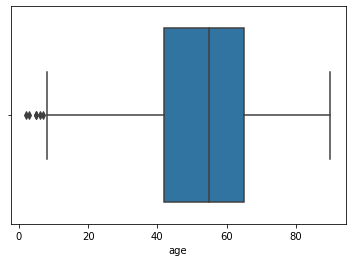

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


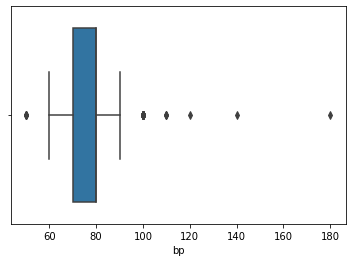

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


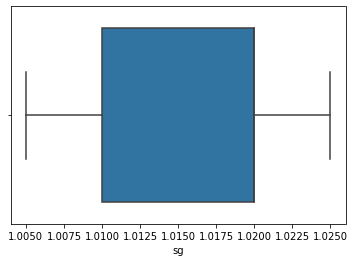

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


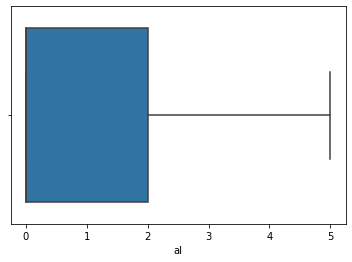

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


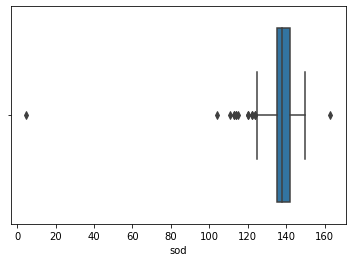

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


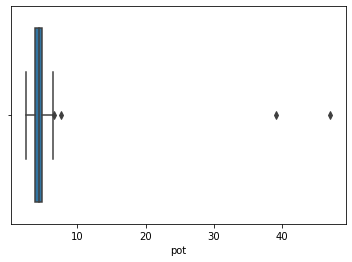

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


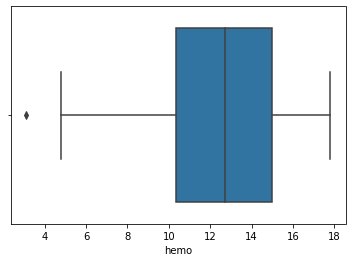

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


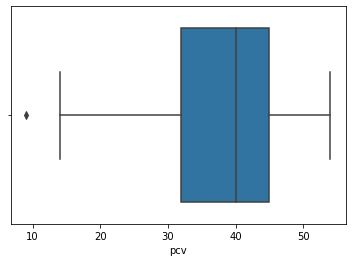

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


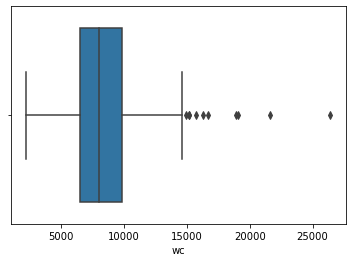

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


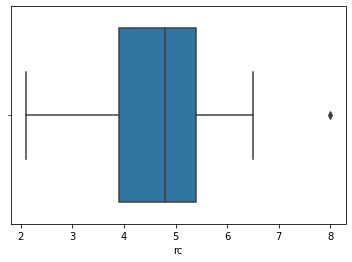

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


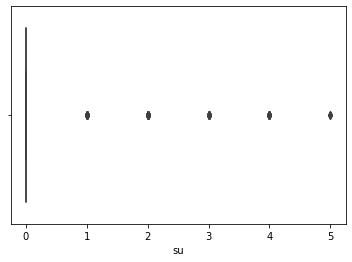

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


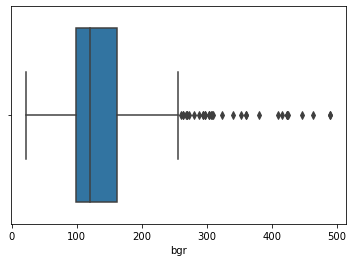

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


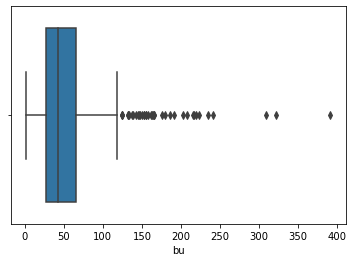

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


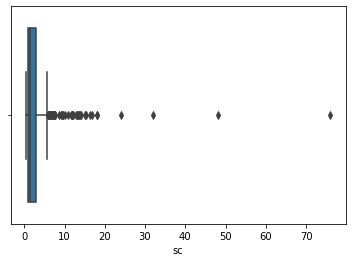

In [46]:
for x in numerical:
    sns.boxplot(df[x])
    plt.show()

In [47]:
for x in numerical:
  q1 = df[x].quantile(0.25)
  q3 = df[x].quantile(0.75)
  IQR = q3 - q1
  upper_limit = q3 + (1.5 * IQR)
  lower_limit = q1 - (1.5 * IQR)
  df[x] = np.where(df[x]>=upper_limit,df[x].median(),df[x])
  df[x] = np.where(df[x]<=lower_limit,df[x].median(),df[x])

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


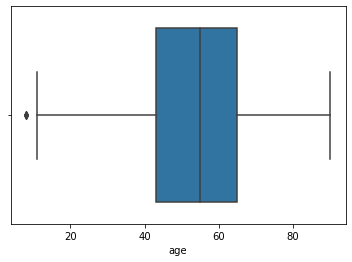

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


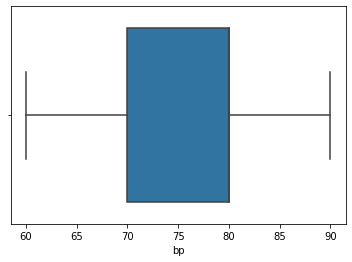

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


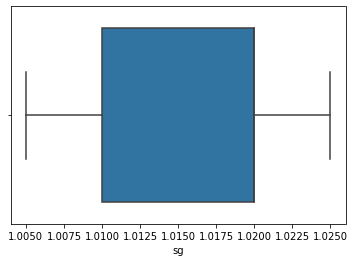

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


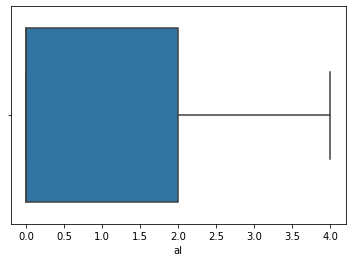

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


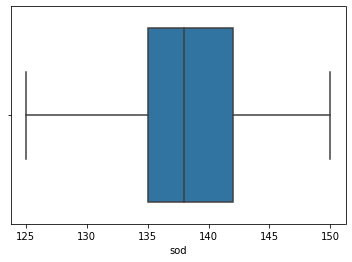

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


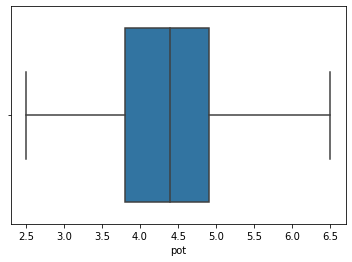

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


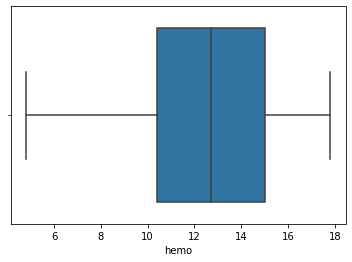

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


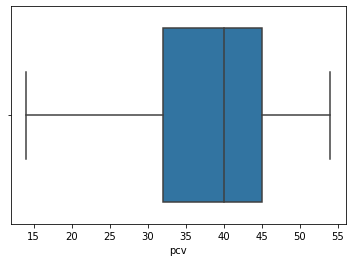

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


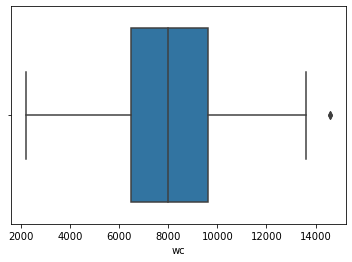

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


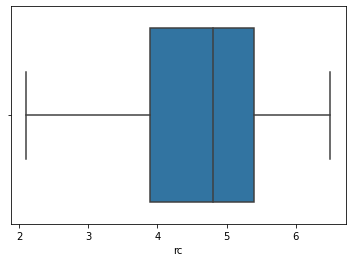

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


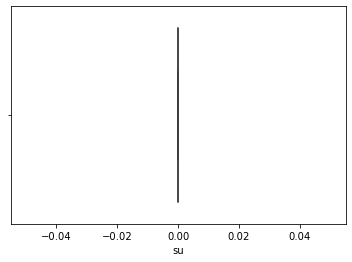

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


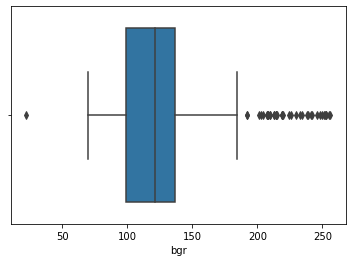

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


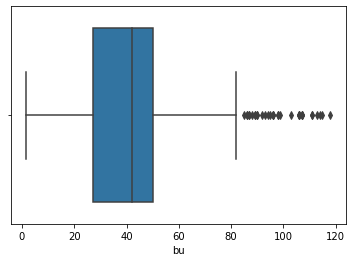

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


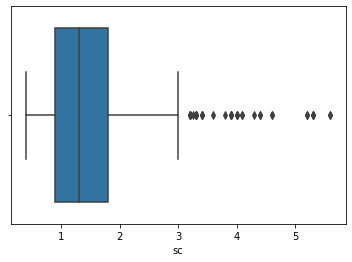

In [48]:
for x in numerical:
    sns.boxplot(df[x])
    plt.show()

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bgr'>

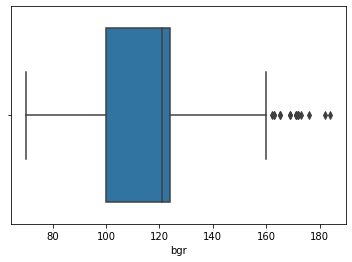

In [49]:
q1 = df['bgr'].quantile(0.25)
q3 = df['bgr'].quantile(0.75)
IQR = q3 - q1
upper_limit = q3 + (1.5 * IQR)
lower_limit = q1 - (1.5 * IQR)
df['bgr'] = np.where(df['bgr']>=upper_limit,df['bgr'].median(),df['bgr'])
df['bgr'] = np.where(df['bgr']<=lower_limit,df['bgr'].median(),df['bgr'])
sns.boxplot(df['bgr'])

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bu'>

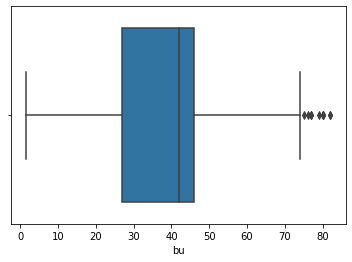

In [50]:
q1 = df['bu'].quantile(0.25)
q3 = df['bu'].quantile(0.75)
IQR = q3 - q1
upper_limit = q3 + (1.5 * IQR)
lower_limit = q1 - (1.5 * IQR)
df['bu'] = np.where(df['bu']>=upper_limit,df['bu'].median(),df['bu'])
df['bu'] = np.where(df['bu']<=lower_limit,df['bu'].median(),df['bu'])
sns.boxplot(df['bu'])

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sc'>

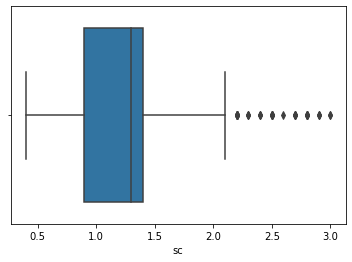

In [51]:
q1 = df['sc'].quantile(0.25)
q3 = df['sc'].quantile(0.75)
IQR = q3 - q1
upper_limit = q3 + (1.5 * IQR)
lower_limit = q1 - (1.5 * IQR)
df['sc'] = np.where(df['sc']>=upper_limit,df['sc'].median(),df['sc'])
df['sc'] = np.where(df['sc']<=lower_limit,df['sc'].median(),df['sc'])
sns.boxplot(df['sc'])

In [52]:
print('CHECKING FOR NULL VALUES : ')
print("-------------------------------------")
df.isnull().sum()

CHECKING FOR NULL VALUES : 
-------------------------------------


age                 9
bp                 11
sg                 46
al                 45
su                 48
rbc               150
pc                 64
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                71
wc                105
rc                129
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [53]:
for x in df.columns:
  if(df[x].dtypes=='float64'):
    df[x].fillna(df[x].median(),inplace = True)
  else:
    df[x].fillna(df[x].mode()[0],inplace = True)

In [54]:
df.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

## ENCODING THE CATEGORICAL COLUMN

In [55]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [56]:
df['rbc'] = le.fit_transform(df['rbc'])
df['rbc'].value_counts()

1    351
0     47
Name: rbc, dtype: int64

In [57]:
df['pc'] = le.fit_transform(df['pc'])
df['pc'].value_counts()

1    322
0     76
Name: pc, dtype: int64

In [58]:
df['pcc'] = le.fit_transform(df['pcc'])
df['pcc'].value_counts()

0    356
1     42
Name: pcc, dtype: int64

In [59]:
df['ba'] = le.fit_transform(df['ba'])
df['ba'].value_counts()

0    376
1     22
Name: ba, dtype: int64

In [60]:
df['htn'] = le.fit_transform(df['htn'])
df['htn'].value_counts()

0    251
1    147
Name: htn, dtype: int64

In [61]:
df['dm'] = le.fit_transform(df['dm'])
df['dm'].value_counts()

0    262
1    136
Name: dm, dtype: int64

In [62]:
df['cad'] = le.fit_transform(df['cad'])
df['cad'].value_counts()

0    364
1     34
Name: cad, dtype: int64

In [63]:
df['appet'] = le.fit_transform(df['appet'])
df['appet'].value_counts()

0    316
1     82
Name: appet, dtype: int64

In [64]:
df['pe'] = le.fit_transform(df['pe'])
df['pe'].value_counts()

0    322
1     76
Name: pe, dtype: int64

In [65]:
df['ane'] = le.fit_transform(df['ane'])
df['ane'].value_counts()

0    338
1     60
Name: ane, dtype: int64

In [66]:
df['classification'] = le.fit_transform(df['classification'])
df['classification'].value_counts()

0    248
1    150
Name: classification, dtype: int64

## VISUALIZATIONS

## UNIVARIATE ANALYSIS

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bp', ylabel='Density'>

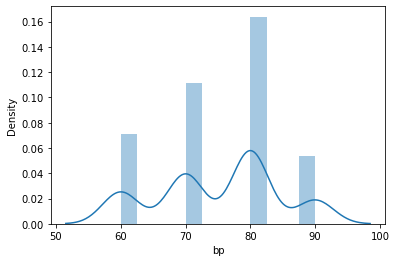

In [67]:
sns.distplot(df['bp'])

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sg', ylabel='Density'>

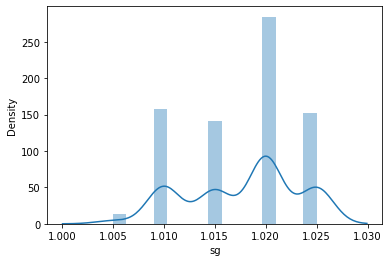

In [68]:
sns.distplot(df['sg'])

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='al', ylabel='Density'>

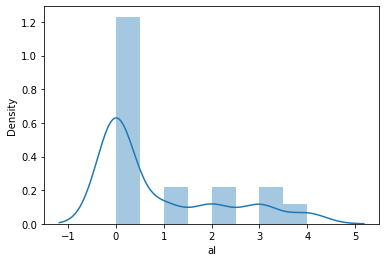

In [69]:
sns.distplot(df['al'])

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='appet'>

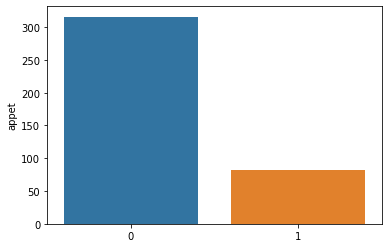

In [70]:
sns.barplot(df['appet'].value_counts().index,df['appet'].value_counts())

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='rbc'>

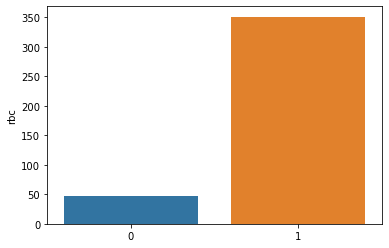

In [71]:
sns.barplot(df['rbc'].value_counts().index,df['rbc'].value_counts())

## BIVARIATE ANALYSIS

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='sod'>

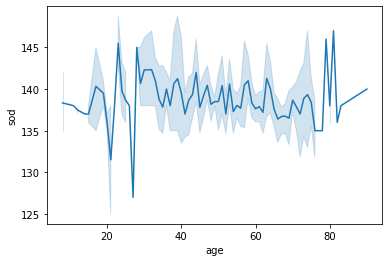

In [72]:
sns.lineplot(df['age'],df['sod'])

In [73]:
def countplot_of_2(x,hue,title=None,figsize=(18,5)):
  plt.figure(figsize=figsize)
  sns.countplot(data=df[[x,hue]],x=x,hue=hue)
  plt.title(title)
  plt.show()

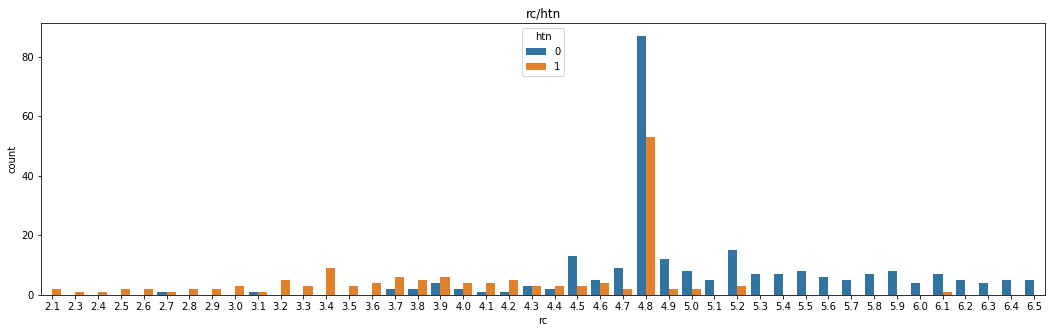

In [74]:
countplot_of_2('rc','htn','rc/htn')

## MULTIVARIATE ANALYSIS

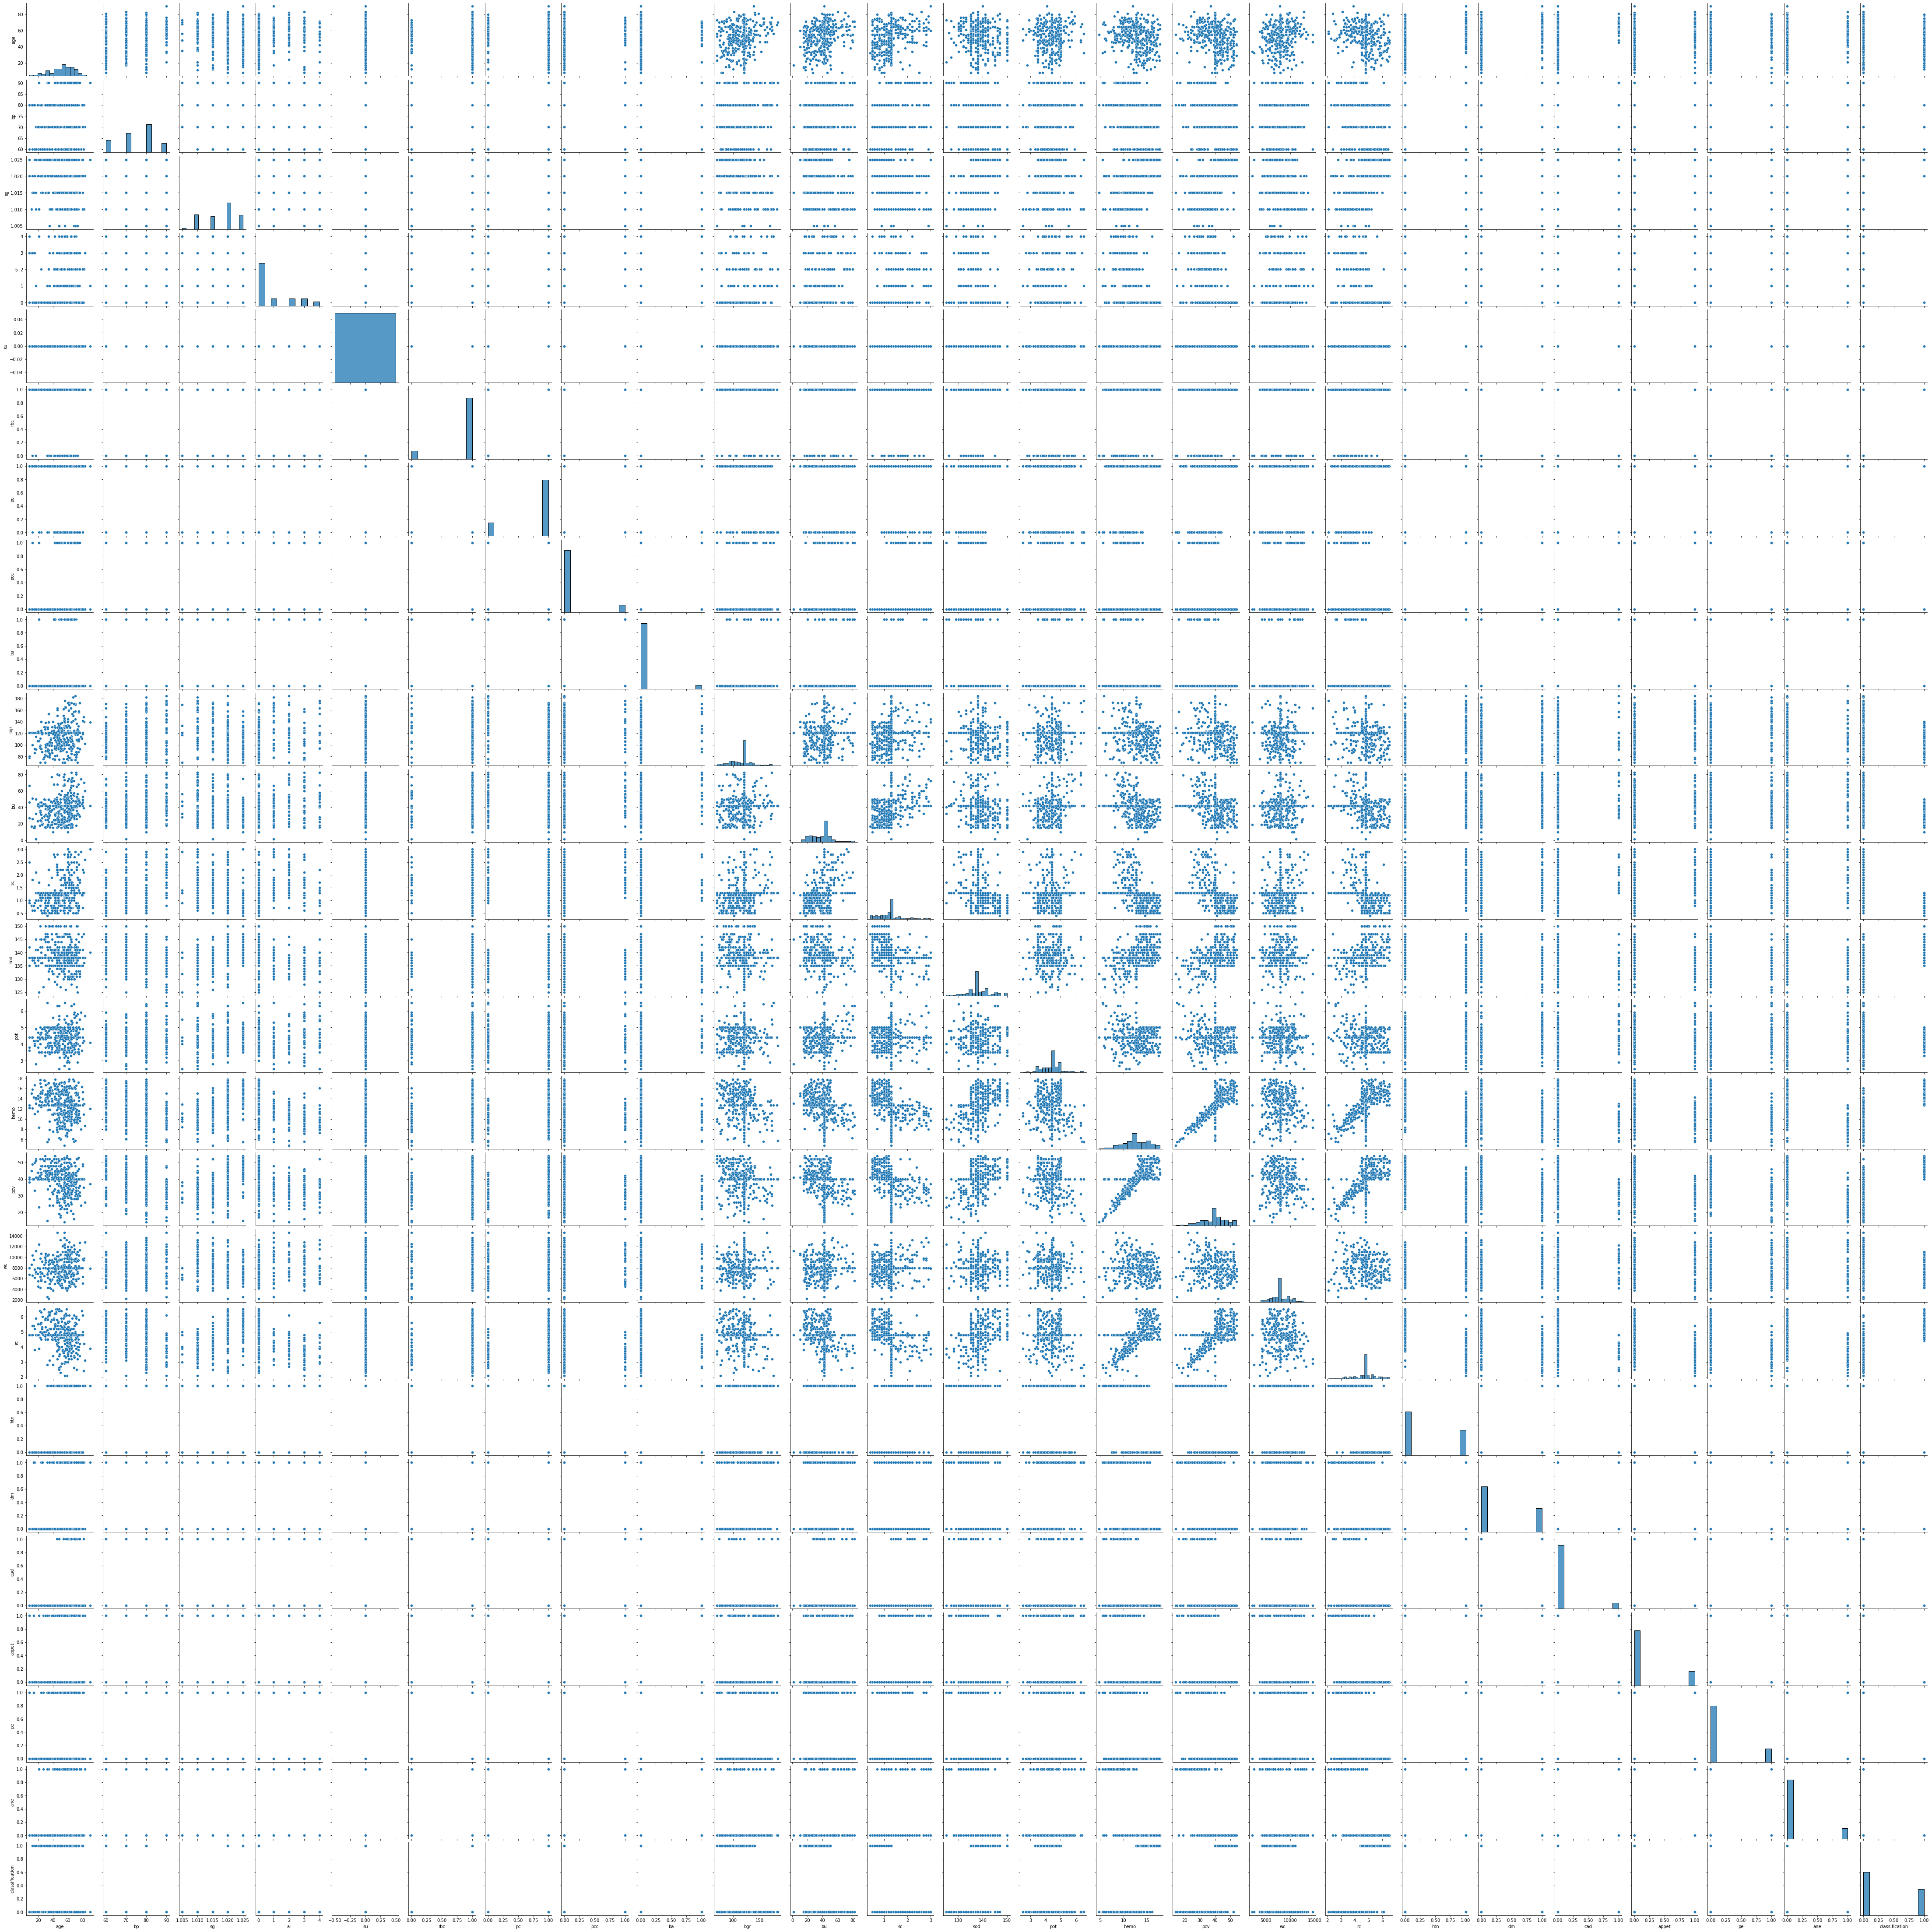

In [75]:
sns.pairplot(df)

## DEPENDENT INDEPENDENT SPLIT

In [76]:
X = df.drop(columns = ['classification'],axis = 1)
X.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,15.4,44.0,7800.0,5.2,1,1,0,0,0,0
1,55.0,80.0,1.020,4.0,0.0,1,1,0,0,121.0,...,11.3,38.0,6000.0,4.8,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,0.0,1,1,0,0,121.0,...,9.6,31.0,7500.0,4.8,0,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,11.2,32.0,6700.0,3.9,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,11.6,35.0,7300.0,4.6,0,0,0,0,0,0


In [77]:
y = df['classification']
y.tail()

395    1
396    1
397    1
398    1
399    1
Name: classification, dtype: int64

## SCALING

In [78]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

In [79]:
X_scaled = pd.DataFrame(scale.fit_transform(X),columns = X.columns)
X_scaled

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,0.487805,0.666667,0.75,0.25,0.0,1.0,1.0,0.0,0.0,0.447368,...,0.815385,0.750,0.451613,0.704545,1.0,1.0,0.0,0.0,0.0,0.0
1,0.573171,0.666667,0.75,1.00,0.0,1.0,1.0,0.0,0.0,0.447368,...,0.500000,0.600,0.306452,0.613636,0.0,0.0,0.0,0.0,0.0,0.0
2,0.658537,0.666667,0.25,0.50,0.0,1.0,1.0,0.0,0.0,0.447368,...,0.369231,0.425,0.427419,0.613636,0.0,1.0,0.0,1.0,0.0,1.0
3,0.487805,0.333333,0.00,1.00,0.0,1.0,0.0,1.0,0.0,0.412281,...,0.492308,0.450,0.362903,0.409091,1.0,0.0,0.0,1.0,1.0,1.0
4,0.524390,0.666667,0.25,0.50,0.0,1.0,1.0,0.0,0.0,0.315789,...,0.523077,0.525,0.411290,0.568182,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,0.573171,0.666667,0.75,0.00,0.0,1.0,1.0,0.0,0.0,0.614035,...,0.838462,0.825,0.362903,0.636364,0.0,0.0,0.0,0.0,0.0,0.0
394,0.414634,0.333333,1.00,0.00,0.0,1.0,1.0,0.0,0.0,0.043860,...,0.900000,1.000,0.451613,0.931818,0.0,0.0,0.0,0.0,0.0,0.0
395,0.048780,0.666667,0.75,0.00,0.0,1.0,1.0,0.0,0.0,0.263158,...,0.846154,0.875,0.354839,0.750000,0.0,0.0,0.0,0.0,0.0,0.0
396,0.109756,0.000000,1.00,0.00,0.0,1.0,1.0,0.0,0.0,0.385965,...,0.723077,0.925,0.403226,0.863636,0.0,0.0,0.0,0.0,0.0,0.0


## TRAIN TEST SPLIT

In [80]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state = 50)

In [81]:
print('X_train: ',X_train.shape)

X_train:  (298, 24)


In [82]:
print('X_test: ',X_test.shape)

X_test:  (100, 24)


In [83]:
print('y_train: ',y_train.shape)

y_train:  (298,)


In [84]:
print('y_test: ',y_test.shape)

y_test:  (100,)


## MODEL BUILDING

In [85]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier()

## TRAINING THE MODEL

In [86]:
model1.fit(X_train,y_train)

DecisionTreeClassifier()

## TEST THE MODEL

In [87]:
train_pred = model1.predict(X_train)
test_pred = model1.predict(X_test)

## EVALUATION METRICS

ACCURACY SCORE

In [88]:
from sklearn.metrics import accuracy_score
print('TRAINING ACCURACY : ',accuracy_score(y_train,train_pred))
print('TESTING ACCURACY : ',accuracy_score(y_test,test_pred))

TRAINING ACCURACY :  1.0
TESTING ACCURACY :  0.98


CONFUSION MATRIX

In [89]:
pd.crosstab(y_test,test_pred)

col_0,0,1
classification,,
0,69,1
1,1,29


In [90]:
from sklearn.metrics import classification_report
classification_report(y_test,test_pred)

'              precision    recall  f1-score   support\n\n           0       0.99      0.99      0.99        70\n           1       0.97      0.97      0.97        30\n\n    accuracy                           0.98       100\n   macro avg       0.98      0.98      0.98       100\nweighted avg       0.98      0.98      0.98       100\n'

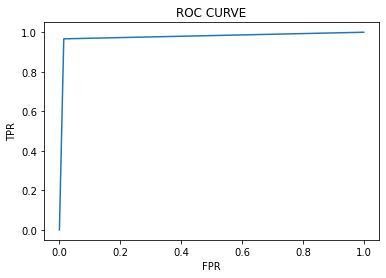

0.9761904761904763

In [91]:
from sklearn.metrics import roc_curve,roc_auc_score
probability = model1.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,probability)
plt.plot(fpr,tpr)
plt.title('ROC CURVE')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()
roc_auc_score(y_test,probability)

## USING THE MODEL

In [92]:
model1.predict([[80,70,1.02,0,0,1,1,0,0,104,28,1.1,135,4.1,15.3,48,6300,6.1,0,0,0,0,0,0]])

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [93]:
model1.predict([[48,70,1.005,4,0,1,0,1,0,117,56,3.8,111,2.5,11.2,32,6700,3.9,1,0,0,1,1,1]])


/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [94]:
model1.predict([[47,60,1.02,0,0,1,1,0,0,137,17,0.5,150,3.5,13.6,44,7900,4.5,0,0,0,0,0,0]])

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [95]:
model1.predict([[73,100,1.01,3,2,0,0,1,0,295,90,5.6,140,2.9,9.2,30,7000,3.2,1,1,1,1,0,0]])

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

## IBM DEPLOYMENT

TO INSTALL IBM WATSON MACHINE LEARNING LIBRARY

In [96]:
!pip install -U ibm-watson-machine-learning

In [97]:
from ibm_watson_machine_learning import APIClient 
import json

In [98]:
wml_credentials = {
    "apikey":"XW9EUMQ8JCF0sDp-JTd4gugsD_CHji5XdLtln4_3VIQU",
    "url":"https://us-south.ml.cloud.ibm.com"
}

In [99]:
wml_client = APIClient(wml_credentials)

In [100]:
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ----------------  ------------------------
ID                                    NAME              CREATED
97213eda-dedc-492e-bbdf-0364d05e8f74  deployment_cloud  2022-11-12T17:28:56.503Z
------------------------------------  ----------------  ------------------------


In [101]:
SPACE_ID = "97213eda-dedc-492e-bbdf-0364d05e8f74"

## to set the space as default space

In [102]:
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

## check for software specification

In [104]:
wml_client.software_specifications.list(500)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

## save and deploy model

In [105]:
import sklearn 
sklearn.__version__

'1.0.2'

In [114]:
MODEL_NAME = "CKD PREDICTION"
DEPLOYMENT_NAME = "deployment_cloud"
DEMO_MODEL = model1

## set python version

In [108]:
software_spec_uid = wml_client.software_specifications.get_id_by_name('runtime-22.1-py3.9')

## setup model meta

In [111]:
model_props = {
    wml_client.repository.ModelMetaNames.NAME : MODEL_NAME,
    wml_client.repository.ModelMetaNames.TYPE : 'scikit-learn_1.0',
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID : software_spec_uid
}

## save model

In [115]:
model_details = wml_client.repository.store_model(
    model = DEMO_MODEL,
    meta_props = model_props,
    training_data = X_train,
    training_target = y_train
)

No "artifact_uid" provided.


In [116]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'classification',
  'schemas': {'input': [{'fields': [{'name': 'age', 'type': 'float64'},
      {'name': 'bp', 'type': 'float64'},
      {'name': 'sg', 'type': 'float64'},
      {'name': 'al', 'type': 'float64'},
      {'name': 'su', 'type': 'float64'},
      {'name': 'rbc', 'type': 'float64'},
      {'name': 'pc', 'type': 'float64'},
      {'name': 'pcc', 'type': 'float64'},
      {'name': 'ba', 'type': 'float64'},
      {'name': 'bgr', 'type': 'float64'},
      {'name': 'bu', 'type': 'float64'},
      {'name': 'sc', 'type': 'float64'},
      {'name': 'sod', 'type': 'float64'},
      {'name': 'pot', 'type': 'float64'},
      {'name': 'hemo', 'type': 'float64'},
      {'name': 'pcv', 'type': 'float64'},
      {'name': 'wc', 'type': 'float64'},
      {'name': 'rc', 'type': 'float64'},
      {'name': 'htn', 'type': 'float64'},
      {'name': 'dm', 'type': 'float64'},
      {'name': 'cad', 'type': 'float64'},
      {'name

## to generate model id

In [118]:
model_id = wml_client.repository.get_model_id(model_details)
model_id

'63fbbf87-7798-4964-9706-8c58269b91ca'

## set meta

In [120]:
deployment_props = {
    wml_client.deployments.ConfigurationMetaNames.NAME : DEPLOYMENT_NAME , 
    wml_client.deployments.ConfigurationMetaNames.ONLINE : {}
}

## deploy

In [125]:
deployment = wml_client.deployments.create(
    artifact_uid = model_id,
    meta_props = deployment_props
)



#######################################################################################

Synchronous deployment creation for uid: '63fbbf87-7798-4964-9706-8c58269b91ca' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='c1e89e99-46e5-4d40-b58f-e141cee6e5a0'
------------------------------------------------------------------------------------------------


